# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [1]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [2]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

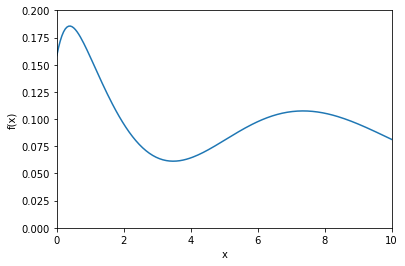

In [3]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [75]:
def analytic(x):
    a = x
    b = numpy.arctan(x)
    u = (2*(3**0.5))*x
    c = (1/12)*((6*x)-(u*numpy.sin(u))-(numpy.cos(u)))
    point = a+b+c
    fbase = numpy.linspace(0,10,1000)
    farray = numpy.zeros(len(fbase))
    xarray = numpy.zeros(len(farray))
    check1 = 0
    csum = 0
    for i in range(0,len(farray)):
        farray[i] = csum
        farray[i] += f(fbase[i])
        csum += f(fbase[i])
    for i in range(0,len(farray)):
        xarray[i] = point-farray[i]
        if xarray[i]-check1 < 0:
            final = farray[i]
            break
        else:
            check1 = farray[i]
    return final
        
        
def genSample(npts):
    randvalues = numpy.random.random(npts)
    randvalues = randvalues*10
    sample = numpy.zeros(npts)
    for i in range(0,npts):
        sample[i] = analytic(randvalues[i])
    return sample

In [76]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


Text(0.5,1,'Generating values according to a probability distribtion')

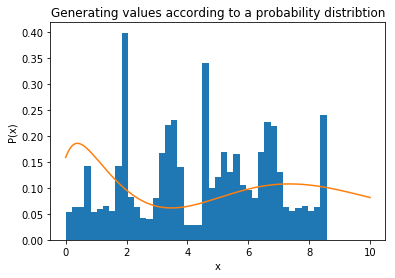

In [77]:
samplex = genSample(10000)
ts = numpy.linspace(0,10)
plt.hist(samplex,bins=ts, density = True)
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('P(x)')
plt.xlabel('x')
plt.title('Generating values according to a probability distribtion')